# 1. Abstract

### Aim
Credit card based online payments has grown intensely, compelling the financial organisations to implement and continuously improve their fraud detection system. However, credit card fraud dataset is heavily imbalanced and different types of misclassification errors may have different costs and it is essential to control them, to a certain degree, to compromise those errors. Classification techniques are the promising solutions to detect the fraud and non-fraud transactions. Unfortunately, in a certain condition, classification techniques do not perform well when it comes to huge numbers of differences in minority and majority cases. Hence in this study, resampling methods, Under Sampling, Over Sampling and HybridTechniques, were applied in the credit card dataset to overcome the rare events in the dataset.  Then, the three resampled datasets were classified using classification techniques. The performances were measured by their  accuracy, precision, area under curve (AUC) and recall. The findings disclosed that by resampling the dataset, the models were more practicable, gave better performance and were statistically better. 

### Goals and objectives: 

•	The goal of this project is to detect anonymous credit card transactions and label it as fraudulent or genuine in transactional data. Fraud detection involves monitoring the behavior of users to estimate, detect, or avoid undesirable behavior.

•	The objective is to handle data imbalance problem and create simple and commonly used machine learning models like logistic regression, Random forest and maybe others to compare how they perform regarding the metric chosen (Precision, Recall etc) for the task of predicting fraudulent credit card transactions.


### Data description


The [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/data) contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise. 


### Metrics

* Usually accuracy is the first metric that comes to mind when someone is assessing a model performance. However, we must be careful. The data in this case is highly unbalanced, so accuracy is not a good metric at all. If we created a model that always classifies a transaction as non-fraudulent, we would have an astonishing accuracy of 99.83%! So, what is the solution? We should use other metrics to consider a model as good or bad.

* The metrics to be used will be the Area Under the ROC curve (also called AUC), and the recall and precision scores obtained from the confusion matrix. We are also using model accuracy.

* The ROC curve is a plot with the true positive rate on the y-axis and false positive rate on the x-axis. The true positive rate answers the question "When the actual classification is positive, how often does the classifier predict positive?" and the false positive rate answers the question "When the actual classification is negative, how often does the classifier incorrectly predict positive?"

* The AUC shows how good the classifier is in separating the classes. The closer to 1, the better is the classifier.

* Precision answers the question "what proportion of positive identifications was actually correct?" and recall answers "what proportion of actual positives was identified correctly?"

* Model accuracy is the overall accuracy of the model. So we are alos including this, just to check if the accuracy of the model is changing after performing resampling techniques.

With these 4 metrics the we can to tell whether the model performance is good or poor.


### Research Idea

So the research idea is about finding different methods in resampling techniques which can be used to handle the data Imbalance problem and checking how each of our classifier performs after and before applying resampling techniques.



### Project Flowchart

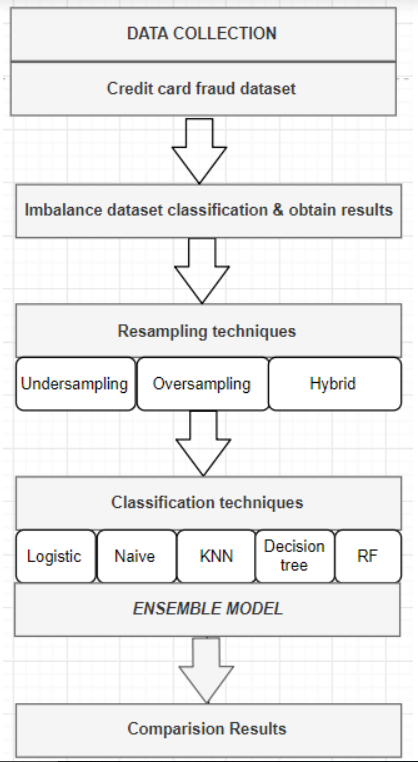

In [3]:
Image("flowchart.png")

### Methods used

1. Analysis on Imbalanced dataset
2. Undersampling balancing techniques
3. Oversampling techniques.
4. Hybrid techniques
5. Comparing results


### Classifiers used:

1. Logistic Regression
2. Naive Bayes
3. KNN
4. Random forest
5. Decision tree
6. Ensemble model combining all the above classifiers

### Initial Analysis:

1. Credit card fraud now a days has been in light for bad.
2. We hear a lot of stories regarding the false transactions, duplicate transactions and error transactions.
3. We collected a data set which has the information of a banking sector with all the credit card transactions. 
4. The data is unbalanced and major analysis involves prediction of  credit card fraud in the transactional data. 
5. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
6. Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes.
7. Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. 
8. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.
9. Our research is more about different techniques used to handle imbalance datasets to avoid this problem.

# 2. PART A ( Classification techniques on Imbalance dataset)

### Import Libraries

#### Overview of this section : 

1. We have imported necessary libraries
2. We have loaded the dataset and observed Initial results
3. We standardized the data
4. We split the dataset to test and train (33%, 67%)
5. We have trained the models and analysed results on test using logistic Regression, Naive and Random forest to classify the dataset to fraud and non fraud. The results obtained in this section are the results on Imbalance dataset.

In [9]:
# Import basic libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn

# plot functions
#import plot_functions as pf

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

# settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from IPython.display import Image


### Load Data  
The dataset used in this project is freely available at: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [12]:
#Reading the data
df = pd.read_csv("creditcard.csv")

In [13]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [15]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Explore label class

In [16]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


* So there are 284315 normal classes and 492 fraud classes, dataset is highly imbalanced.

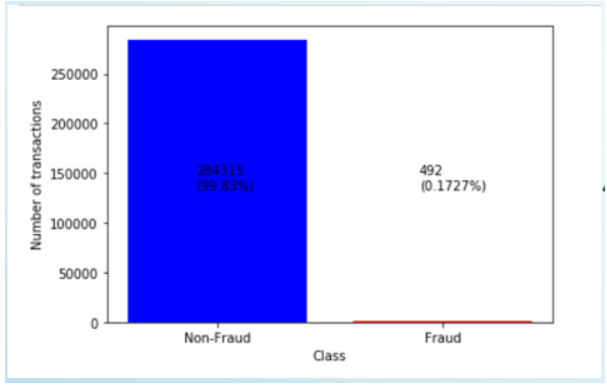

In [34]:
Image("imbalanceddata.png")

### Separate feature data (predictors) from labels

* Splitting the data into test and train, so we are separating before that.

In [17]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

### Standardize data
Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1

In [18]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Partition data into train and test sets

In [19]:
# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

### Train models without resampling methods

* The models to be used are shown below. There are also functions to plot the confusion matrix and the ROC curve for the models
Three machine learning algorithms: Logistic Regression, Naive Baye, and RandomForest classifiers were trained using the processed feature data.

In [20]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

In [21]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  100.0%

Confusion Matrix:
 [[190477      0]
 [    23    320]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190477
           1       1.00      0.93      0.97       343

   micro avg       1.00      1.00      1.00    190820
   macro avg       1.00      0.97      0.98    190820
weighted avg       1.00      1.00      1.00    190820


===== LogisticRegression =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  99.9%

Confusion Matrix:
 [[190451     26]
 [   131    212]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190477
           1       0.89      0.62      0.73       343

   micro avg       1.00      1.00      1.00    190820
   macro avg       0.95  

In [23]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print() 




========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[93827    11]
 [   36   113]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.91      0.76      0.83       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.96      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987


=== LogisticRegression ===
Model Accuracy:  99.9%

Confusion Matrix:
 [[93825    13]
 [   55    94]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.88      0.63      0.73       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.94      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987


=== Naive Baiy

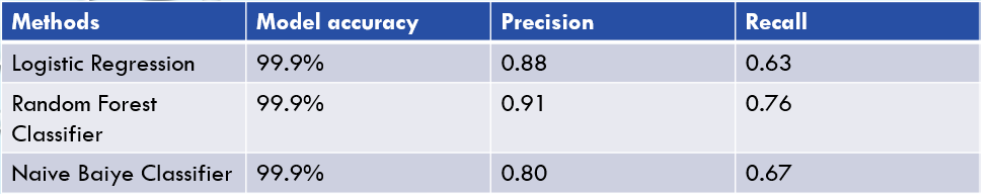

In [35]:
Image("image.png")

### Results:

1. But the accuracy is really impressive which is not the right metric.Our model accuracy is> 99.9%.It is a poor measure of performance on imbalanced datasets
2. As expected Recall for all the methods Logistic Regression,RandomForest Classifier, Naive Bayes is 63%, 76% and 67% respectively. Recall is the metric for our fraudalent observations. If this low that means we didn't do a good job in classifying fraudalent data. 
3. Precision can be seen as “how useful the results are”, and recall is “how complete the results are”
4. An ROC curve (receiver operating characteristic curve) is a graph that shows the performance of a classification algorithm at all classification thresholds. This curve plots TPR vs. FPR. In our results it is 0.98, 0.94,0.97 respectively for Logistic Regression,RandomForest Classifier, Naive Bayes.



# 3. PART B: Data Sampling  techniques 


In later notebooks we implemented Resampling techniques to balance out data. Three widely-used methods for resampling in this study are Under Sampling, Over Sampling and Hybrid sampling. For under sampling, RUS, Cluster Centroid and AllKNN is chosen. For over sampling ROS, SMOTE and ADASYN were chosen as oversampling methods because of its widely usage. Furthermore, ROS is an intuitive way of balancing data, whereas SMOTE is more complex creating synthetic samples using K-Nearest Neighbour (KNN). For Hybrid sampling we used the Techniques SMOTEEN and SMOTETomek.

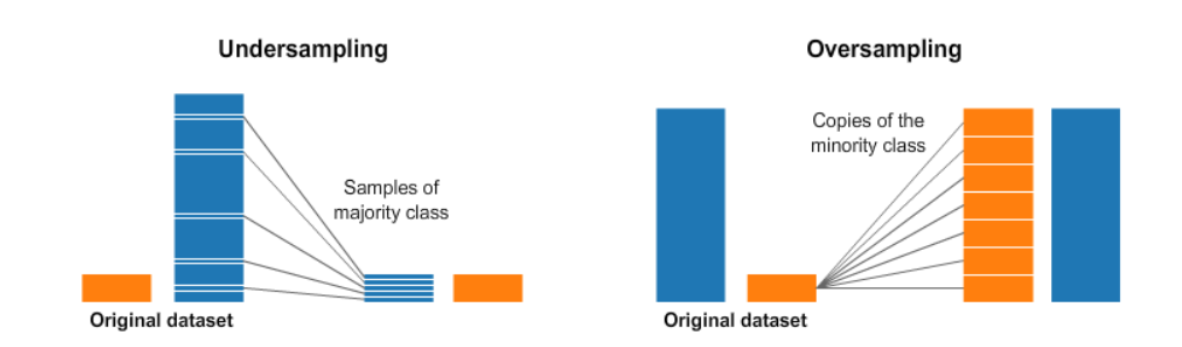

In [2]:
Image("picture.png")

* Credit Card dataset is a binary classification task. Either the transaction is classified as non-fraud (0) or fraud (1). After the data have been resampled accordingly, the models are needed to be trained using classifiers to evaluate the methods. Thus, in this study, five different classification techniques were explored: Naïve Bayes (NB), Logistic Regression (LR), Random Forest (RF), Decision Tree(DT), KNN and Ensembled Learning. 

# CODE NOTEBOOKS( Resampling techniques)

Three Resampling techniques were used Undersampling, Oversampling and Hybrid techniques. Code notebooks are mentioned in another notebooks. Links are provided in respective sections. Results are summed up in both notebooks

#### I. Link to [UNDERSAMPLING TECHNIQUES](http://localhost:8891/notebooks/Undersampling_techniques(RUS%2C%20Tomek%20Links%2C%20AIIKNN).ipynb)
#### II. Link to [OVERSAMPLING TECHNIQUES](http://localhost:8891/notebooks/Oversampling_techniques(ROS%2CSMOTE%2CADASYN).ipynb)
#### III. Link to [HYBRID TECHNIQUES](http://localhost:8891/notebooks/Hybrid_techniques(SMOTE%20TOMEK%2C%20SMOTEEEN).ipynb)

### I. UNDERSAMPLING METHODS

This method works in reducing the number of observations of the majority class.It randomly selects observations from the predominant class or informative where an algorithm will process the data to extract observations while trying to don’t lose valuable information.Advantage-best to use when you have a big data set and removing some samples will help with the run time and storage problems. Disadvantage-you can lose valuable information about the majority class.


#### 1. Random Under Sampler(RUS): 
Randomly remove samples from the majority class, with or without replacement. This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may increase the variance of the classifier and may potentially discard useful or important samples.

#### 2. Cluster Centroid:
Cluster Centroids uses the concept of finding cluster centroid (clusters are created encircling data-points belonging to the majority class). The cluster centroid is found by obtaining the average feature vectors for all the features, over the data points belonging to the majority class in feature space

#### 3. AllKNN: 
Class to perform undersampling based on KNN methods

#### 4. Tomek links: 
TOMEK - Tomek links can be used as an under-sampling method or as a data cleaning method. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that form Tomek links, examples from both classes are removed.

#### 5. RESULTS OF UNDERSAMPLING: 

When we used Random Undersampling, the recall is high for decision tree but the precision is very low i.e, 1.35%. So we are ignoring it. Both logistic regression and random forest have recall 87.16% but the precision is 7.94% and 6.04% respectively. So, we can clearly say that random forest is the best metric for random undersampling. 

When we used Cluster Centroids, the recall is very high i.e, 100% but the precision is very low with values in the range 0.23% and 1.19%. So, we can clearly say that this resampler method is not the best method.

TOMEK LINKS AND AIIKNN resampler methods are not giving good results while balancing the datasets. So, we can conclude that these resampler methods are not good for our project.

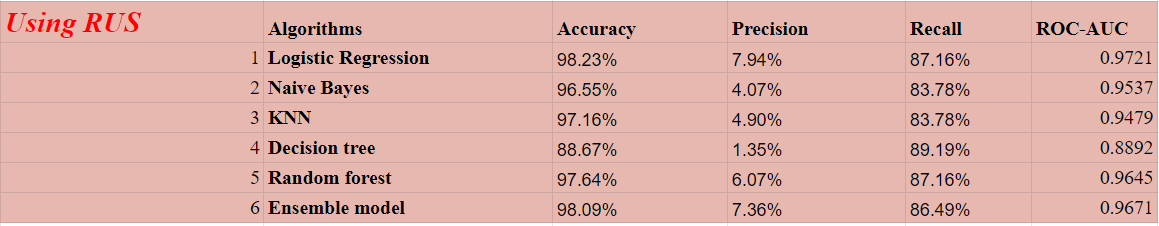

In [24]:
Image("rus.png")

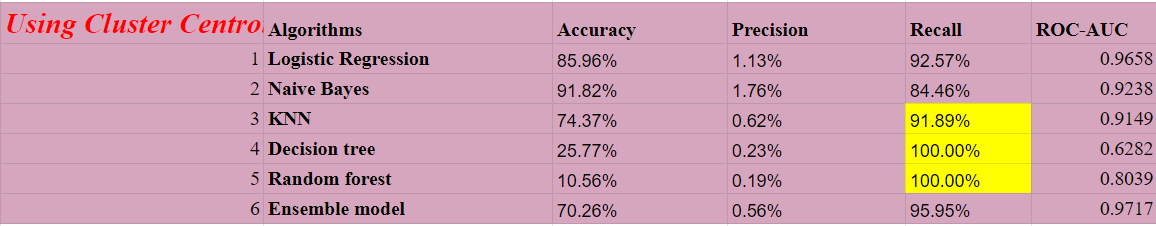

In [25]:
Image("clustercentroids.png")

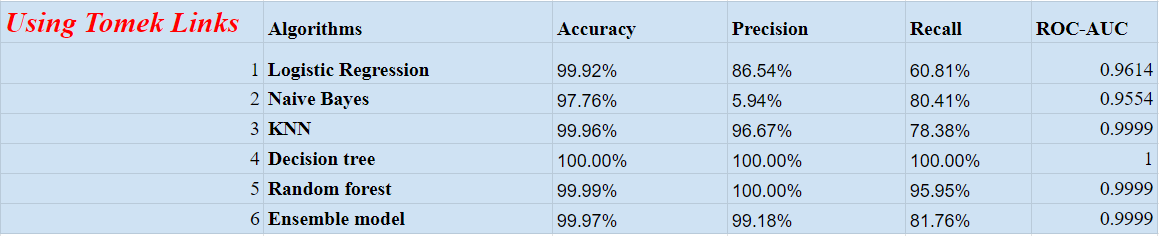

In [26]:
Image("tomeklinks.png")

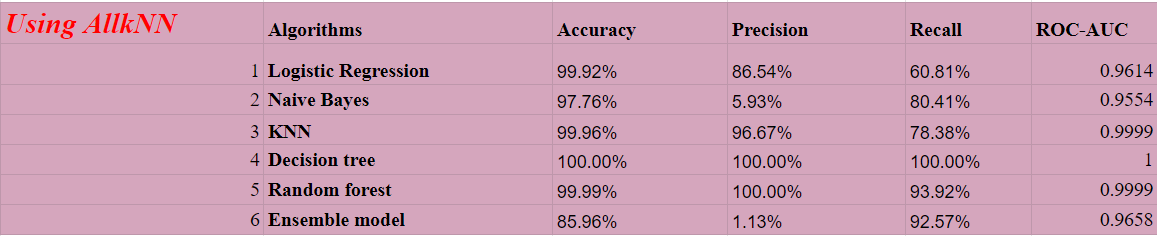

In [27]:
Image("allknn.png")

### II. OVERSAMPLING METHODS

This method works by increasing the number of minority class.It either duplicates the entries or manufacturing the data that is the same of what we have.. Advantage- there is no loss of data. Disadvantage- multiple instances can lead to overfitting.


#### 1. Random Over Sampler(RUS): 
ROS(Random Oversampling Method)- Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. Oversampling can be done more than once (2x, 3x, 5x, 10x, etc.) It is one of the best robust method. Instead of duplicating every sample in the minority class, some of them may be randomly chosen with replacement.
With the random oversampling method, we can verify the true power of ensemble models. Our ensemble model combined the best part of the simple models and could get a very high AUC (0.967), high precision (85.19%) and high recall (77.7%). Looking at the confusion matrix we can see the cases for false negative and false positive as 33 and 20, respectively. The logistic regression was the model with the lowest number of false negatives (only 18) and the random forest was the model with the lowest number of false positives (an astonishing result of only 3!). So, if we try to tweak the weights for each model in the ensemble model, we can achieve an even better result.


#### 2. SMOTE:
The analysis for SMOTE method is very similar to the random oversampling method. Again, we can see that the ensemble model could get the best parts of all simple models, resulting in a good performance. Once again, tweaking the weights for each simple model might be a way to enhance the result.

#### 3. ADASYN: 
ADASYN is a improve version of SMOTE.  After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered. Our Random Forest produces much better results under ADASYN with Accuracy-99.94%, Precision-85.82%, Recall-77.70% and ROCAUC of 0.934.

#### RESULTS AFTER OVERSAMPLING TECHNIQUES

With the random oversampling method, we can verify the true power of ensemble models. Our ensemble model combined the best part of the simple models and could get a very high AUC (0.967), high precision (85.19%) and high recall (77.7%). Looking at the confusion matrix we can see the cases for false negative and false positive as 33 and 20, respectively. The logistic regression was the model with the lowest number of false negatives (only 18) and the random forest was the model with the lowest number of false positives (an astonishing result of only 3!). So, if we try to tweak the weights for each model in the ensemble model, we can achieve an even better result.

The analysis for SMOTE method is very similar to the random oversampling method. Again, we can see that the ensemble model could get the best parts of all simple models, resulting in a good performance. Once again, tweaking the weights for each simple model might be a way to enhance the result.

An interesting result is that in all cases of resampling, the highest AUC score among the simple models was using logistic regression. In my opinion, binary classification problems should have at least this model as a benchmark when the objective is to maximize the AUC.

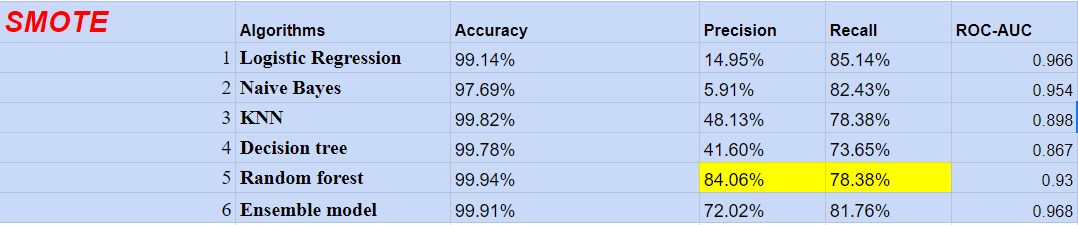

In [3]:
Image("smote.png")

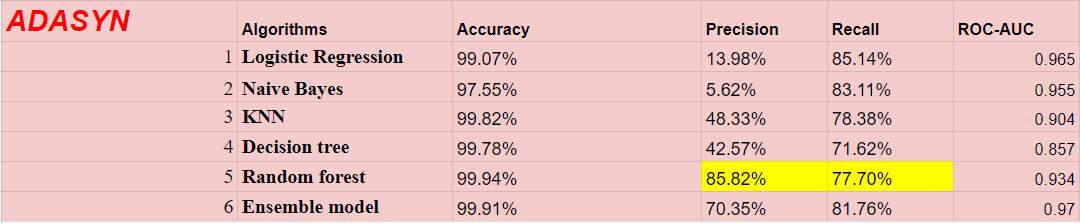

In [4]:
Image("adasyn.png")

### III.HYBRID TECHNIQUES

A hybrid sampling procedure that uses a combination of two sampling techniques to create a balanced data set. By using more than one sampling technique, we can combine the strengths of the individual techniques while lessening the drawbacks.Two of the most famous methods are:

#### 1.SMOTE-ENN :

We implemented SMOTE Tomek technique. Tomek links can be used as an under-sampling method or as a data cleaning method. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that form Tomek links, examples from both classes are removed. Implementing this technique with Random forest gives us the Accuracy of 99.93%, Precision of 83.82%, Recall of 77.03% and ROCAUC of 0.93077.


#### 2.SMOTE-TOMEK : 

SMOTEEEN Edited Nearest Neighbor removes any example whose class label differs from the class of at least two of its three nearest neighbors. The ENN method removes the instances of the majority class whose prediction made by KNN method is different from the majority class. ENN method can remove both the noisy examples as borderline examples, providing a smoother decision surface. ENN tends to remove more examples than the Tomek links does, so it is expected that it will provide a more in-depth data cleaning. In this technique, Random Forest gives an accuracy or 99.93%, Precision of 80.41%, Recall of 80.41% and ROCAUC of 0.93077


#### RESULTS AFTER HYBRID TECHNIQUES

Clearly SMOTE EEN, Random forest gives the best result with a Precision of 80.41% which is our True Positive on Actual Results and Recall of 80.41% which is our True Positive on Predicted Results.


As we saw that we were not getting good results with Random Oversampling and Random Undersampling methods, we are building hydrid methods by combining both oversampling and undersampling methods. Hybrid methods take one method from oversampling and one method from undersampling, combines them and performs balancing. 

With SMOTE TOMEK, we can see that recall is high for logistic regression and naive bayes but the precision for both of them is very low. The recall and precision for random forest is 80.41%. So, we can clearly say that random forest is teh best metric for this SMOTE TOMEK.

With SMOTE EEN, we can see that recall is high for logistic regression and naive bayes but the precision for both of them is very low. The recall and precision for random forest is 77.03% and 83.82% respectively. So, we can clearly say that random forest is teh best metric for this SMOTE EEN.

So, we can conclude that SMOTE EEN is the best resampling method among SMOTE TOMEK AND SMOTEEEN.

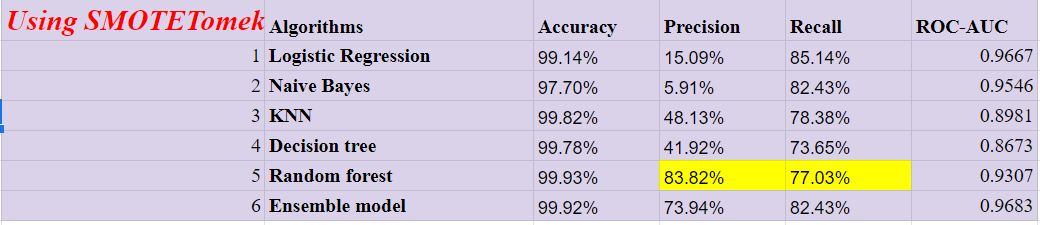

In [5]:
Image("smotetomek.png")

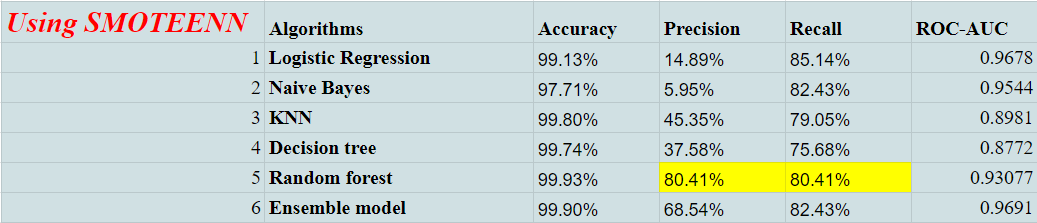

In [6]:
Image("smoteenn.png")

# 4. CONCLUSION 

1. Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes.

2. Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets which is proved here
3. These algorithms tend to show a bias for the majority class, treating the minority class as a noise in the dataset. 
4. The accuracy score of this algorithm will yield an accuracy of 99% which seems impressive, but is it really? The minority class is totally ignored in this case and this can prove expensive in some classification problems, such as the case of a credit card fraud, which can cost individuals and businesses lots of money.
5. As expected Recall for all the methods Logistic Regression,RandomForest Classifier, Naive Bayes is 63%, 76% and 67% respectively. Recall is the metric for our fraudalent observations. If this low that means we didn't do a good job in classifying fraudalent data.
6. Hybrid techniques tend to perform well compared to Undersampling and Oversampling techniques
7. SMOTE-ENN is best among all the methods because the recall and precision both are around 80.41% compared to other methods in which one of them is less.
8. Undersampling methods are usually not that effective and our results also show the same. Moreover there might be loss of data , we can reject these models.
9. Out of oversampling techniques SMOTE and ADASYN performs decently. But can combine with undersampling methods like TOMEK, its more effective.
10. Every technique gives different results when run on algorithms, like SMOTE gives some results on Random forest which are very different from results when run on Naive Bayees or Logistc
11. Tree based classifiers such as Random forest works better when Resampling techniques are applied.
12. Ensemble models need not perform better always, our table results show that.

# 5. SCOPE

This entire project was performed in three phases
1. Initial Research and analysis without sampling techniques
2. Undersampling and Oversampling
3. Hybrid techniques

Extensive research has been carried out by 3 of us to know about the sampling techniques.Lot of research has been done in each and every technique and different methods involved and the basic differences among them. Chooing the classifiers was also a big task.So the project scope is completely sufficient for this semester

### Future scope

1. The entire research has been carried out by splitting the data into 67% train and 33% test.
2. We can also change the test and train sampling percentage and check the results , which will be different.
3. We can also do neural network analysis and check if there's any change
4. Predictive models can alos be built to improve efficiency of our fraud system.

# 6. CONTRIBUTION

By us : 70%

Tried to replicate the code of one of the sampling techniques in our own way. All the sampling techniques code included in this project are through our research and libraries available by authenticated sources.

By External Source: 30% We took Part A from another research

# 7. CITATION

Data set is taken from the kaggle website : https://www.kaggle.com/mlg-ulb/creditcardfraud

### Code sources


1. https://towardsdatascience.com/implementation-of-cluster-centroid-based-majority-under-sampling-technique-ccmut-in-python-f006a96ed41c
2. https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
https://arxiv.org/pdf/1106.1813.pdf
3. https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167
4. https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
5. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.7757&rep=rep1&type=pdf
6. https://towardsdatascience.com/precision-vs-recall-386cf9f89488


#### Imblearn provides some great functionality for dealing with imbalanced data.

1. For Random Under sampling: 
https://imbalanced-learn.org/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html
2. For Random Oversampling: 
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
3. For SMOTE:
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
4. For SMOTE-ENN: 
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html
5. For ADASYN: 
https://imbalanced-learn.org/en/stable/generated/imblearn.over_sampling.ADASYN.html

#### For most of the classification algorithms

* https://scikit-learn.org/stable/supervised_learning.html
* http://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* https://www.kaggle.com/randyrose2017/using-scikit-learn-and-keras-for-fraud-detection
* We use t- SNE for visualizing the data and tensor flow to build the predictive model.
https://www.datascience.com/blog/fraud-detection-with-tensorflow



#### Research papers

1. Anderson M. (2008). ‗From Subprime Mortgages to Subprime Credit Cards ‘. Communities and Banking, Federal Reserve Bank of Boston, pp. 21-23.
2. Chan P.K. et al (1999). ‗Distributed Data Mining in Credit Card Fraud Detection ‘, IEEE Intelligent Systems, pp. 67-74. 9. Chang C. & Chang S. (2010). 
3. The Design of E-Traveler ‘s Check with efficiency and Mutual Authentication ‘. Journal of Networks, Vol. 5, No. 3, pp. 275-282.
4. Delamaire et al. (2009) ‘Credit Card Fraud Detection Techniques: A Review’, Banks and banks Systems, Vol. 4, Issue 2, pp. 57-68.
* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.96.9248&rep=rep1&type=pdf
* https://thesai.org/Downloads/Volume9No11/Paper_55-Handling_Class_Imbalance_in_Credit_Card_Fraud.pdf
* https://arxiv.org/pdf/1608.06048.pdf
* https://www.hindawi.com/journals/complexity/2018/5764370/
* https://pdfs.semanticscholar.org/0be1/e1f748845244bf8ff4041bb5e7d35b9057ee.pdf?_ga=2.64650601.731729570.1553044261-      1175306196.1553044261
*https://www.researchgate.net/publication/326986162_Credit_Card_Fraud_Detection_Using_Machine_Learning_As_Data_Mining_Technique




## 8. COPYRIGHT

Copyright 2019 Monisha Vodnala Fairy DMonte Harshitha Sanikommu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.